# Run Simulation

In [1]:
import sys
import os.path
from os.path import dirname
import numpy as np
from ROIAL_simulation import run_simulation
file_dir = dirname(os.getcwd())
root_directory = dirname(dirname(dirname(file_dir))) 


## online learning

In [2]:
# initialize hyperparameters
feedback_type = ['ord','pref']
model_params = {'ord_nos':0,'pref_nos':0.06,'signal_variance': 1.0, 'lengthscales': [0.15, 0.15],'GP_noise_var': 0.01,
             'IG_it':1000,'query_type':'IG','lambda': 0.0, 'saf_method': 'none',
             'pref_noise':0.015,'num_category':5, 'ordinal_noise':0.1}

#define the ordinal threshold the algorithm uses for the simulation
delta_int = 2/model_params['num_category'] 
ordinal_threshold_estimate = np.array([delta_int]*(model_params['num_category']-1))
ordinal_threshold_estimate[0] = -0.5
model_params['ord_threshold_estimate'] = ordinal_threshold_estimate

model_params['saf_method'] = 'IG_ucb' #default is none and 0, which means the ROI is the whole action space
model_params['lambda'] = 1

sub_params = {'model_params':model_params,'rd_sz':100,'run_nums': range(1),'num_trials':60,'D':2,'num_category':5,'ord_perct':False,
               'ord_b1':0.17,'ord_delta':[0.2,0.15,0.13],'file_part': file_dir + '/Simulation/Sampled_functions_2D/30_by_30/Sampled_objective_'}
save_folder = root_directory + '/Results/' + '_'.join(feedback_type) + '_RD_' + str(sub_params['rd_sz']) +'/'

In [5]:

run_simulation(root_directory,feedback_type,sub_params,save_folder)


ordinal threshold true:  [-0.15501024  0.04397411  0.27807335  0.45364777  0.60581227  1.01548593]
900
iteration:  1
111
start rd
(101, 2)
safety set size 101
sampled action:  [ 4 17]
iteration:  2
137
start rd
(102, 2)
safety set size 102
sampled action:  [19  2]
iteration:  3
572
start rd
(103, 2)
safety set size 103
sampled action:  [11 17]
iteration:  4
347
start rd
(104, 2)
safety set size 104
sampled action:  [27 20]
iteration:  5
830
start rd
(105, 2)
safety set size 105
sampled action:  [8 9]
iteration:  6
249
start rd
(106, 2)
safety set size 106
sampled action:  [21 29]
iteration:  7
659
start rd
(107, 2)
safety set size 107
sampled action:  [8 0]
iteration:  8
240
start rd
(108, 2)
safety set size 108
sampled action:  [ 7 27]
iteration:  9
237
start rd
(109, 2)
safety set size 109
sampled action:  [12 28]
iteration:  10
388
start rd
(110, 2)
safety set size 110
sampled action:  [29 26]
iteration:  11
896
start rd
(111, 2)
safety set size 111
sampled action:  [21 21]
iteratio

## post-processing

In [6]:
from post_eval_sub_GP import eval_posterior
eval_posterior(save_folder,model_params,state_dim =2,num_trials = 60,num_runs = range(1),feedback_type = ['ord','pref'])
    


postprocessing run 0
initiate cov matrix
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60


# Visualize Results

<Figure size 432x288 with 0 Axes>

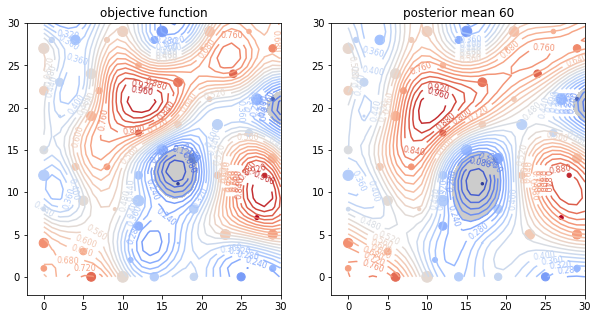

In [3]:
from plot_individual import plot_results
%matplotlib inline
plot_results(save_folder,state_dim = 2,run_num = 0, feedback = 'ord_pref_RD_100',posterior_change = False, subset = True)